In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# So here we will be using dataset from Kaggle Website 
# https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results

In [3]:
df_athlete_events = pd.read_csv(r'athlete_events.csv')
df_noc_region = df = pd.read_csv(r'noc_regions.csv')

Here After Loading Dataset Have A Look For Both Datasets Few Rows By Using Head() 

In [6]:
df_athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
df_noc_region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


Have A Look For Shape Of Dataset

In [9]:
df_athlete_events.shape

(271116, 15)

In [17]:
df_noc_region.shape

(230, 3)

Check the information of the Dataset by using .info()

In [12]:
df_athlete_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [13]:
df_noc_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


Checking Unique Region 

In [15]:
df.region.unique()

array(['Afghanistan', 'Curacao', 'Albania', 'Algeria', 'Andorra',
       'Angola', 'Antigua', 'Australia', 'Argentina', 'Armenia', 'Aruba',
       'American Samoa', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh',
       'Barbados', 'Burundi', 'Belgium', 'Benin', 'Bermuda', 'Bhutan',
       'Bosnia and Herzegovina', 'Belize', 'Belarus', 'Czech Republic',
       'Boliva', 'Botswana', 'Brazil', 'Bahrain', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Central African Republic', 'Cambodia', 'Canada',
       'Cayman Islands', 'Republic of Congo', 'Chad', 'Chile', 'China',
       'Ivory Coast', 'Cameroon', 'Democratic Republic of the Congo',
       'Cook Islands', 'Colombia', 'Comoros', 'Cape Verde', 'Costa Rica',
       'Croatia', 'Greece', 'Cuba', 'Cyprus', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'Eritrea',
       'El Salvador', 'Spain', 'Estonia', 'Ethiopia', 'Russia', 'Fiji',
       'Finland', 'France', 'Germany', 'Micronesia', 'Gabon', 'Gambi

And Now For The Dataset Checking Null Values 

In [16]:
df.isnull().sum()

NOC         0
region      3
notes     209
dtype: int64

Now Cleaning Dataset 

Drop Unnecessary Columns Like Notes Also It has Allmost Null Values Which Is Of No Use.

In [19]:
df_noc_region.drop('notes',axis=1, inplace=True)

In [20]:
df_noc_region.head()

,NOC,region
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


Now Here Only Two Columns Which Is NOC & Region Which Will Be Using

Now Here Merging Two Datasets i.e NOC_Region & Athlete_event By Using 'Merge','on' & 'How' for Join

In [21]:
df = pd.merge(df_athlete_events, df_noc_region, on=['NOC'], how='left')

Here Join is done on NOC of both dataset and now checking for dataset by using head()

In [22]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


So Here as notes column is drop from Noc_region dataset it is reflecting and also join is perfomed on it

Now looking for Duplicated Values from Dataset

In [24]:
df.duplicated().sum()

1385

Here in this dataset 1385 duplicate values found

Now Removing Duplicated Values From DataSet.

In [25]:
df[df.duplicated()].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
1252,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,Belgium
4282,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN,USA
4283,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN,USA
4862,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN,Germany
4864,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN,Germany


In [26]:
df.drop_duplicates(inplace=True)

Here by using drop_duplicated droping the all duplicated values, Now checking again for duplicated value it will show 0

In [27]:
df.duplicated().sum()

0

Previously while checking NOC_Region found in notes many null values as it has been drop now again after joining dataset checking for null values

In [28]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
region       370
dtype: int64

So here Droping the columns will be worse instead can fill missing values with string i.e Data Missing and fill values with mean of specific column will give clean values for dataset

The Null Values Can Be Treated From The Above Scenario & After That 0 Null Values Shown.

In [41]:
df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
region    0
dtype: int64

In [42]:
df.fillna('0', inplace=True)

In [43]:
df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
region    0
dtype: int64

So here after cleaning the dataset, Good to go for some insights which can explore the dataset for valuable output from this Dataset.

# EDA 

### 1:How many olympics games have been held?

In [44]:
df.Games.nunique()

51

### 2:List down all Olympics games held so far.

In [45]:
pd.DataFrame({'Games': sorted(list(df.Games.unique()))})

,Games
0,1896 Summer
1,1900 Summer
2,1904 Summer
3,1906 Summer
4,1908 Summer
5,1912 Summer
6,1920 Summer
7,1924 Summer
8,1924 Winter
9,1928 Summer


### 3: Which Are The Top 10 Countires With Most Number Of Player Participated

In [46]:
top_10_countries = df.Team.value_counts().sort_values(ascending =False).head(10)
top_10_countries

United States    17598
France           11817
Great Britain    11264
Italy            10213
Germany           9230
Canada            9226
Japan             8269
Sweden            8004
Australia         7512
Hungary           6492
Name: Team, dtype: int64

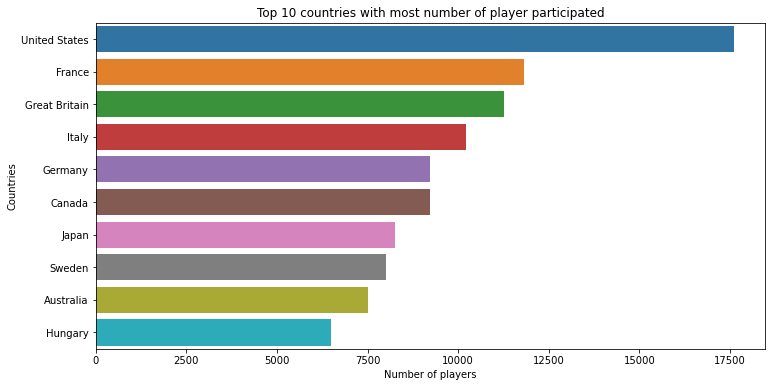

In [47]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_countries, y=top_10_countries.index)
plt.title('Top 10 countries with most number of player participated')
plt.xlabel('Number of players')
plt.ylabel('Countries')
plt.show()

### 4: Mention the total no of nations who participated in each olympics game?

In [48]:
df[['Games','NOC']].groupby(['Games']).nunique()

,NOC
Games,
1896 Summer,12
1900 Summer,31
1904 Summer,15
1906 Summer,21
1908 Summer,22
1912 Summer,29
1920 Summer,29
1924 Summer,45
1924 Winter,19


### 5:  Gender Distribution Of Players?

In [51]:
gender_counts = df.Sex.value_counts()
gender_counts

M    195353
F     74378
Name: Sex, dtype: int64

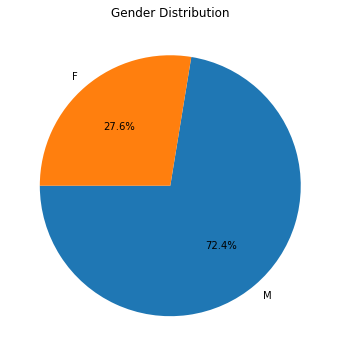

In [52]:
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

### 6: Identify the sport which was played in all summer olympics.

In [56]:
df.groupby('Season').nunique().Games

Season
Summer    29
Winter    22
Name: Games, dtype: int64

Here in Summer 29 was held and in Winter 22 was held

In [57]:
df_sports = df[df.Season == 'Summer'].groupby('Sport').nunique()

In [58]:
Sports = list(df_sports.Games[df_sports.Games == 29].index)
for _ in Sports:
    print(_)

Athletics
Cycling
Fencing
Gymnastics
Swimming


### 7: What Are The Year Wise Total Medal ?

In [59]:
year_wise_total_medal=df.groupby('Year')['Medal'].count()
year_wise_total_medal

Year
1896      380
1900     1898
1904     1301
1906     1733
1908     3069
1912     4040
1920     4292
1924     5570
1928     5238
1932     2817
1936     7146
1948     7383
1952     9358
1956     6434
1960     9235
1964     9480
1968    10479
1972    11959
1976    10502
1980     8937
1984    11588
1988    14676
1992    16413
1994     3160
1996    13780
1998     3605
2000    13821
2002     4109
2004    13443
2006     4382
2008    13602
2010     4402
2012    12920
2014     4891
2016    13688
Name: Medal, dtype: int64

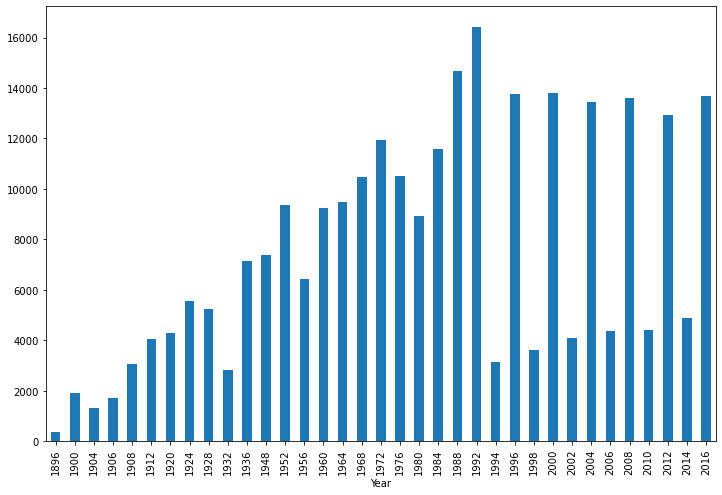

In [61]:
plt.figure(figsize=(12,8))
year_wise_total_medal.plot(kind='bar');


### 8: Which Sports were just played only once in the olympics?

In [62]:
pd.DataFrame(list(df.groupby('Sport').nunique()[df.groupby('Sport').nunique().Games == 1].index))

,0
0,Aeronautics
1,Basque Pelota
2,Cricket
3,Croquet
4,Jeu De Paume
5,Military Ski Patrol
6,Motorboating
7,Racquets
8,Roque
9,Rugby Sevens


### 9: Show Overall Participation By Country?

<AxesSubplot:title={'center':'Overall Participation By Country'}, ylabel='Team'>

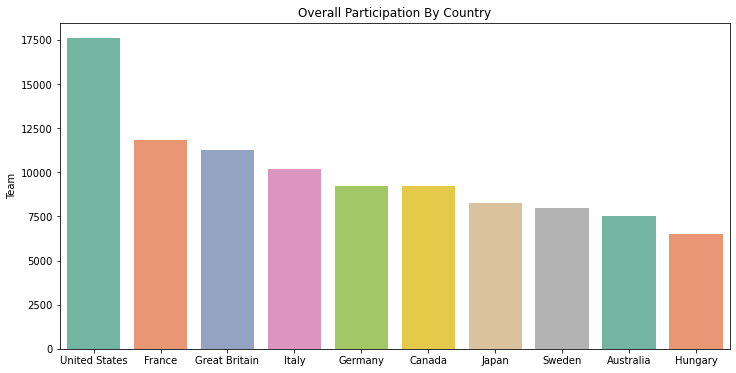

In [63]:
plt.figure(figsize=(12,6))
plt.title('Overall Participation By Country')
sns.barplot(x=top_10_countries.index,y=top_10_countries,palette ='Set2')

### 10: Fetch the total no of sports played in each olympic games.

In [64]:
df[['Games', 'Sport']].groupby('Games').nunique()

,Sport
Games,
1896 Summer,9
1900 Summer,20
1904 Summer,18
1906 Summer,13
1908 Summer,24
1912 Summer,17
1920 Summer,25
1924 Summer,20
1924 Winter,10


### 12: Fetch the top 5 athletes who have won the most gold medals.

In [66]:
pd.DataFrame(df[df.Medal == 'Gold'].groupby('Name').count().sort_values('Medal', ascending=False).Medal.head())

,Medal
Name,
"Michael Fred Phelps, II",23
"Raymond Clarence ""Ray"" Ewry",10
Mark Andrew Spitz,9
Paavo Johannes Nurmi,9
Larysa Semenivna Latynina (Diriy-),9


### 13: Fetch the top 5 athletes who have won the most medals (gold/silver/bronze).

In [67]:
pd.DataFrame(df.groupby('Name').count().sort_values('Medal', ascending=False).Medal.head())

,Medal
Name,
Heikki Ilmari Savolainen,39
"Joseph ""Josy"" Stoffel",38
Ioannis Theofilakis,36
Takashi Ono,33
Andreas Wecker,32


### 14: Fetch the top 5 most successful countries in olympics. Success is defined by no of medals won.

In [68]:
df[['region', 'Medal']][df.Medal.notnull()].groupby('region').count().sort_values('Medal', ascending=False).head()

,Medal
region,
USA,18604
Germany,15787
France,12551
UK,12115
Russia,11692


### 15: Country Who Won Max Gold Medal in Year?

In [70]:
max_year = df.Year.max()

team_list = df[(df.Year == max_year) & (df.Medal=='Gold')].Team

team_list.value_counts().head(10)

United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

### 16: Country Wise Medals For The Year 2016?

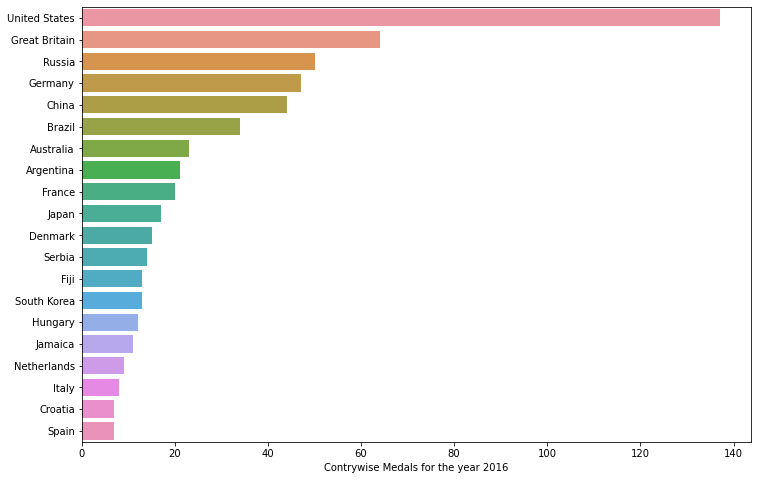

In [72]:
plt.figure(figsize=(12,8))
sns.barplot(x=team_list.value_counts().head(20), y=team_list.value_counts().head(20).index)
plt.ylabel(None);
plt.xlabel('Contrywise Medals for the year 2016');

### 17: In which Sport/event, India has won highest medals.

In [80]:
pd.DataFrame(df.loc[(df.NOC == 'IND') & df.Medal.notnull()].groupby('Sport').count().sort_values('Medal').tail(1)['Medal'])

,Medal
Sport,
Hockey,345


### 18: Break down all olympic games where India won medal for Hockey and how many medals in each olympic games.

In [81]:
pd.DataFrame(df.loc[(df.NOC == 'IND') & (df.Medal == 'Gold')].groupby('Games').count().sort_values('Medal', ascending=False)['Medal'])

,Medal
Games,
1948 Summer,20
1936 Summer,19
1956 Summer,17
1980 Summer,16
1932 Summer,15
1964 Summer,15
1928 Summer,14
1952 Summer,14
1924 Winter,7


### 19: Overall Participation Country Wise?

United States    17598
France           11817
Great Britain    11264
Italy            10213
Germany           9230
Canada            9226
Japan             8269
Sweden            8004
Australia         7512
Hungary           6492
Name: Team, dtype: int64

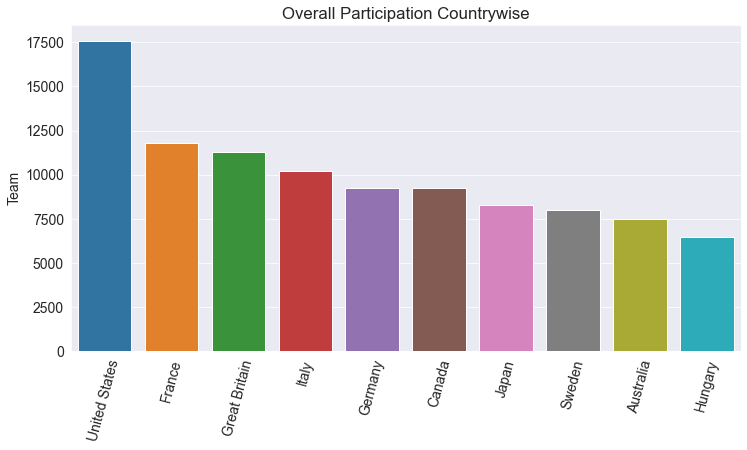

In [87]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Overall Participation Countrywise')
sns.barplot(x=top_countries.index, y=top_countries);

### 20: Show Womens Medal Per Edition Of The Games?

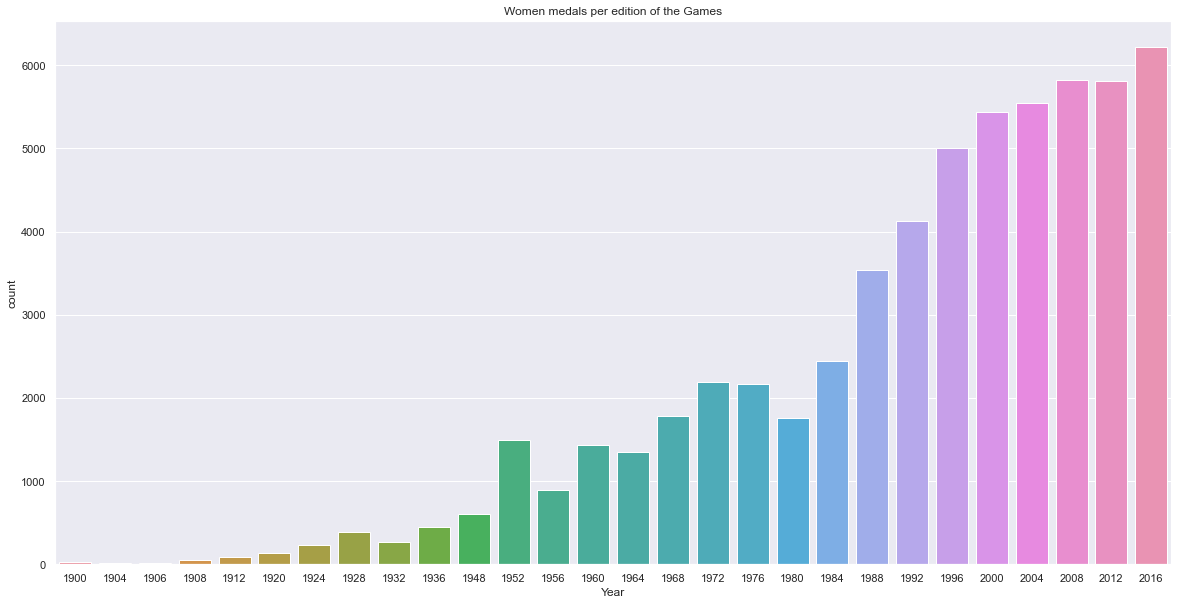

In [88]:
Women_In_Olympics = df[(df.Sex == 'F') & (df.Medal != 'None') & (df.Season =='Summer')]

sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=Women_In_Olympics)
plt.title('Women medals per edition of the Games');

# CONCLUSIONS / INSIGHTS


1.	From 1896 to 2016, there are 51 Olympic games happened.
2.	In 2016, a total of 207 countries participated in Olympics.
3.	France, Italy, Switzerland, UK participated in all of the Olympics games..
4.	Aeronautics, Basque Pelota, Cricket and other 7 games had been removed from the Olympics.
5.  Athletics, Cycling, Fencing, Gymnastics, Swimming were always present.
6.	A total of 34 games now played in Olympics and the least number of games played was just 8.
7.	In 1896 Olympics there were no female athletes but it saw a steady increase over the years and eventually in 2016 Olympics     female participants.
8.	Michael Fred Phelps, II won maximum Gold medals, 23 in Swimming
9.	Heikki Ilmari Savolainen is higest medal scoring athlete (39) in Olympics.
10.	USA won the most number of medals of all time, followed by Germany, France, UK and then Russia.
11.	USA was the most active country scoring the most number of medals in almost every Olympic game since 1896.
12.	India won a total of 345 medals in Hockey.